In [52]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(150, 220, 1), 'hight')
service = ctrl.Antecedent(np.arange(150,220, 1), 'service')
tip = ctrl.Consequent(np.arange(150, 220, 1), 'hights')



In [53]:

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)


In [54]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0,150, 170])
tip['medium'] = fuzz.trimf(tip.universe, [166, 166, 185])
tip['high'] = fuzz.trimf(tip.universe, [181, 181, 210])


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


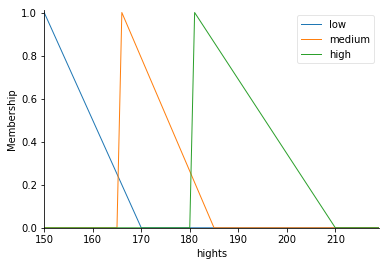

In [55]:
i=quality['average']
# You can see how these look with .view()
tip.view()


C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


(<matplotlib.figure.Figure at 0x8c82470>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa40c630>)

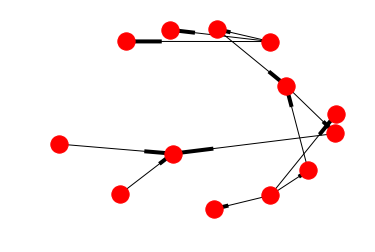

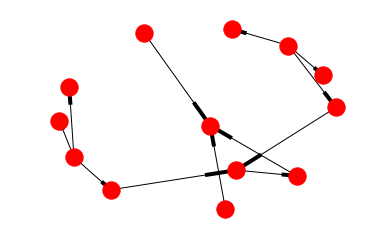

In [56]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

In [57]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [58]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


In [61]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['hight'] = 186.5
tipping.input['service'] = 196.5
tipping.compute()


182.566189512


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


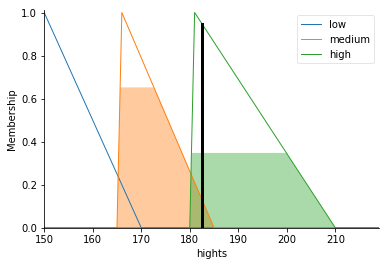

In [63]:
print (tipping.output['hights'])
tip.view(sim=tipping)

In [65]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['hight'] = 233
tipping.input['service'] =233

# Crunch the numbers
tipping.compute()

190.333333333


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


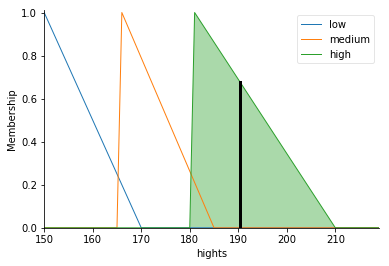

In [67]:
print (tipping.output['hights'])
tip.view(sim=tipping)

In [68]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['hight'] = 150.5
tipping.input['service'] =150.5

# Crunch the numbers
tipping.compute()

157.114845988


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


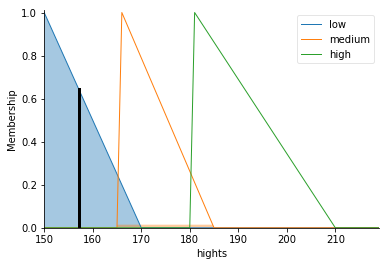

In [69]:
print (tipping.output['hights'])
tip.view(sim=tipping)